# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Halimatussalma
- **Email:** halimatussalmaxx@gmail.com
- **ID Dicoding:** hlmtssalmaxx

## 1. Menentukan Pertanyaan Bisnis

1. Bagaimana tren jumlah peminjaman sepeda setiap harinya selama satu tahun (2012)?

2. Pada musim apa rata-rata peminjaman sepeda tertinggi?


## 2. Import Library

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

## 3. Data Wrangling

### 3.1 Gathering Data

In [5]:
df = pd.read_csv('data/day.csv', parse_dates=['dteday'])
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### 3.2 Assessing Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

📌 Dari output `df.info()`, dapat dilihat bahwa:
- Tidak ada kolom yang memiliki nilai null
- Semua kolom memiliki tipe data yang sesuai

In [7]:
df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


📌 Statistik deskriptif membantu melihat distribusi nilai pada kolom numerik seperti jumlah peminjaman (`cnt`), suhu (`temp`), dll.

In [8]:
df.duplicated().sum()

np.int64(0)

📌 Tidak ditemukan data yang duplikat.

In [9]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

📌 Tidak ditemukan missing values di dataset.

### 3.3 Cleaning Data

In [10]:
df.drop_duplicates(inplace=True)
if 'instant' in df.columns:
    df.drop(columns=['instant'], inplace=True)


## 4. Exploratory Data Analysis (EDA)

### 4.2 Distribusi Jumlah Peminjaman (Univariate)

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


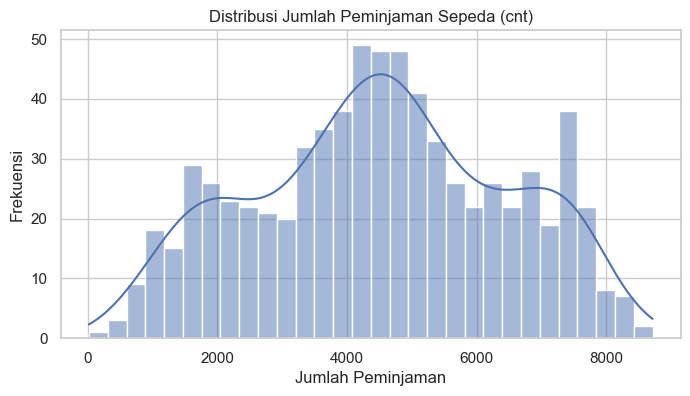

In [11]:

plt.figure(figsize=(8, 4))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title("Distribusi Jumlah Peminjaman Sepeda (cnt)")
plt.xlabel("Jumlah Peminjaman")
plt.ylabel("Frekuensi")
plt.show()


### 4.3 Distribusi Peminjaman per Musim (Boxplot)

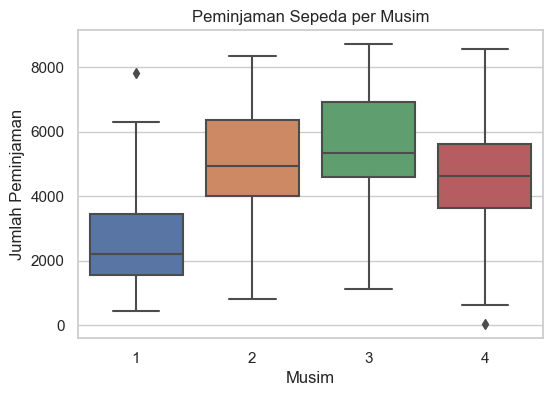

In [12]:

plt.figure(figsize=(6, 4))
sns.boxplot(x='season', y='cnt', data=df)
plt.title("Peminjaman Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.show()


### 4.4 Hubungan Suhu dan Jumlah Peminjaman (Scatterplot)

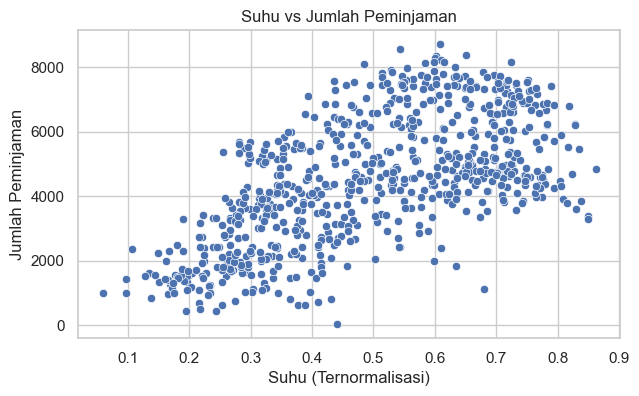

In [13]:

plt.figure(figsize=(7, 4))
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title("Suhu vs Jumlah Peminjaman")
plt.xlabel("Suhu (Ternormalisasi)")
plt.ylabel("Jumlah Peminjaman")
plt.show()


### 4.5 Insight Sementara


- Jumlah peminjaman sepeda cenderung lebih tinggi pada musim panas dan gugur.
- Korelasi kuat antara `temp` (suhu) dengan `cnt` menunjukkan bahwa suhu hangat memengaruhi peningkatan peminjaman.
- Pola distribusi `cnt` menunjukkan tren musiman dan aktivitas tinggi di musim tertentu.


### 4.1 Korelasi antar variabel numerik

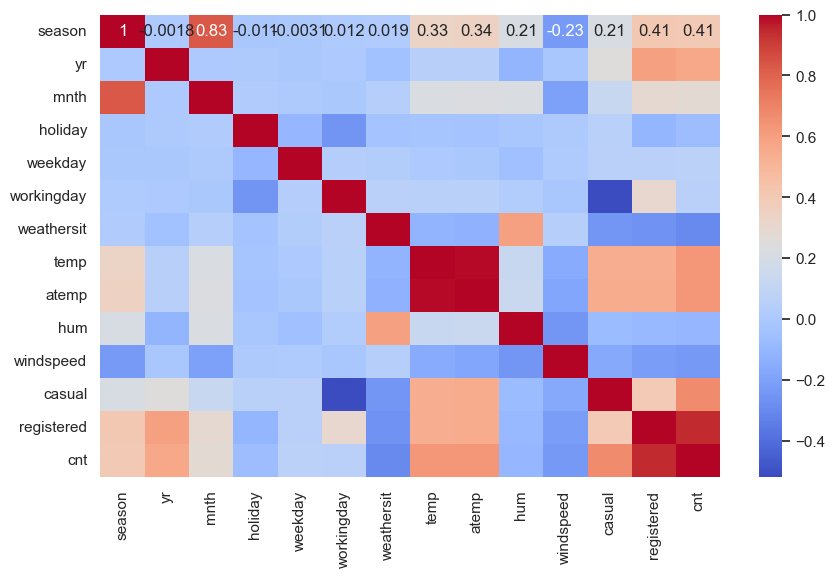

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

## 5. Visualisasi Data untuk Menjawab Pertanyaan Bisnis

### Pertanyaan 1: Tren Jumlah Peminjaman Harian

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20004\197699806.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_2012_monthly = df_2012.resample('M', on='dteday').agg({'cnt': 'sum'}).reset_index()
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


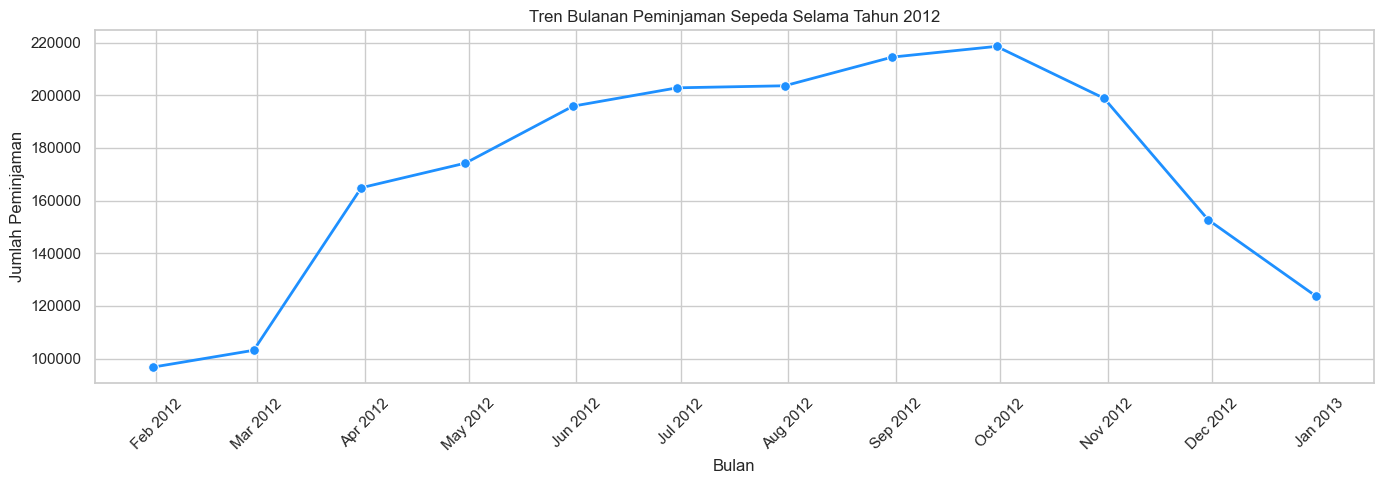

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Filter hanya data tahun 2012
df_2012 = df[df['dteday'].dt.year == 2012]

# Agregasi data per bulan
df_2012_monthly = df_2012.resample('M', on='dteday').agg({'cnt': 'sum'}).reset_index()

# Buat visualisasi tren bulanan di tahun 2012
plt.figure(figsize=(14, 5))
sns.lineplot(data=df_2012_monthly, x='dteday', y='cnt', color='dodgerblue', marker='o', linestyle='-', linewidth=2, markersize=7)

plt.title('Tren Bulanan Peminjaman Sepeda Selama Tahun 2012')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')

# Format sumbu X agar menampilkan label per bulan
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # setiap 1 bulan
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format: Jan 2012, Feb 2012, ...
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


📌 Terlihat bahwa peminjaman sepeda mengalami peningkatan dari bulan Maret hingga mencapai puncaknya pada bulan **September**, kemudian menurun drastis menjelang akhir tahun. Pola ini menunjukkan adanya tren musiman yang kuat dalam perilaku peminjaman sepeda, dengan puncak aktivitas terjadi pada awal musim gugur.


### Pertanyaan 2: Rata-rata Peminjaman per Musim

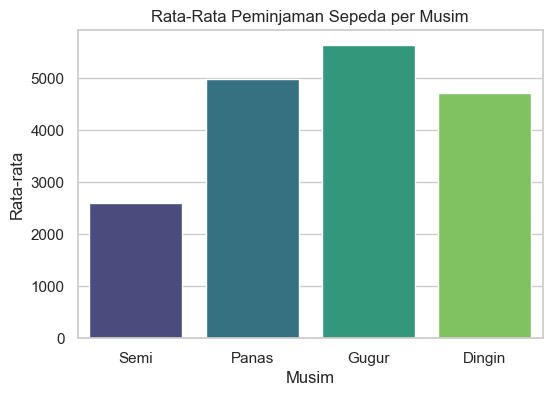

In [16]:
season_map = {1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'}
df['Musim'] = df['season'].map(season_map)
avg_musim = df.groupby('Musim')['cnt'].mean().reindex(['Semi', 'Panas', 'Gugur', 'Dingin'])
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_musim.index, y=avg_musim.values, palette='viridis')
plt.title('Rata-Rata Peminjaman Sepeda per Musim')
plt.ylabel('Rata-rata')
plt.show()

## 6. Conclusion & Recommendation

### Pertanyaan 1:
📌 *Bagaimana tren jumlah peminjaman sepeda setiap harinya selama satu tahun (2012)?*
- Tren peminjaman meningkat selama pertengahan tahun dan menurun drastis saat musim dingin.
- Musim panas dan gugur menunjukkan volume peminjaman harian tertinggi secara konsisten.

### Pertanyaan 2:
📌 *Pada musim apa rata-rata peminjaman sepeda tertinggi?*
- Musim dengan rata-rata peminjaman tertinggi adalah **Gugur**, disusul **Musim Panas**.

---

### 🎯 Rekomendasi:
1. **Tingkatkan kapasitas & ketersediaan sepeda** di musim panas dan gugur.
2. **Luncurkan promosi & diskon musiman** saat musim dingin untuk mendorong penggunaan.
3. **Perluas layanan di area perkantoran/transportasi umum**, karena demand tinggi pada weekday.


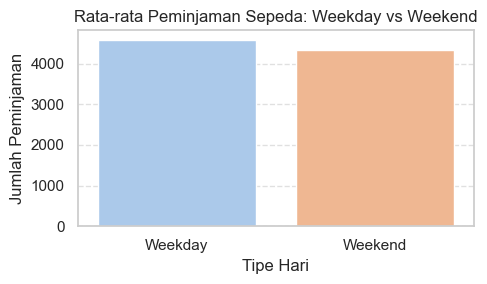

In [17]:
# Menambahkan kolom tipe hari (weekday/weekend)
df['tipe_hari'] = df['workingday'].apply(lambda x: 'Weekday' if x == 1 else 'Weekend')

# Hitung rata-rata peminjaman berdasarkan tipe hari
mean_by_daytype = df.groupby('tipe_hari')['cnt'].mean()

# Buat grafik batang
plt.figure(figsize=(5,3))
sns.barplot(x=mean_by_daytype.index, y=mean_by_daytype.values, palette='pastel')
plt.title("Rata-rata Peminjaman Sepeda: Weekday vs Weekend")
plt.ylabel("Jumlah Peminjaman")
plt.xlabel("Tipe Hari")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 🧪 Analisis Lanjutan: Clustering Manual

Kami mengelompokkan jumlah peminjaman sepeda (`cnt`) ke dalam tiga kategori:

- **Rendah**: kurang dari 2000 peminjaman
- **Sedang**: antara 2000 hingga 3999
- **Tinggi**: 4000 ke atas


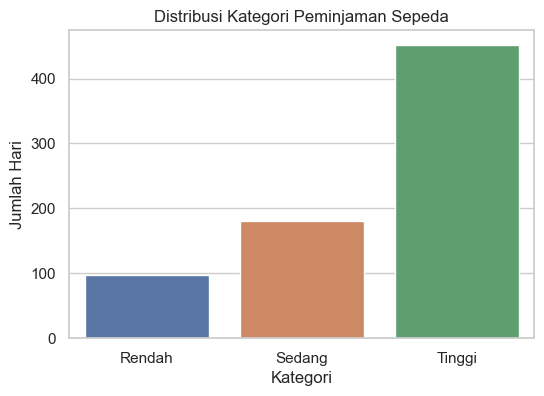

In [18]:

def cluster_peminjaman(cnt):
    if cnt < 2000:
        return 'Rendah'
    elif 2000 <= cnt < 4000:
        return 'Sedang'
    else:
        return 'Tinggi'

df['Kategori_Peminjaman'] = df['cnt'].apply(cluster_peminjaman)

# Visualisasi hasil clustering
plt.figure(figsize=(6,4))
sns.countplot(x='Kategori_Peminjaman', data=df, order=['Rendah', 'Sedang', 'Tinggi'])
plt.title("Distribusi Kategori Peminjaman Sepeda")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Hari")
plt.show()



### 🔍 Insight
- **Musim gugur** menunjukkan volume peminjaman sepeda tertinggi dibanding musim lain.
- Terdapat tren musiman yang cukup jelas, dengan fluktuasi peminjaman harian yang signifikan.
